🔬 Breast Cancer Predictive Analytics for Resource Allocation
Dataset Shape: (569, 30)

Target Distribution:
1    357
0    212
Name: count, dtype: int64

Target Meaning: 0 = Malignant (High Priority), 1 = Benign (Low Priority)

First 5 rows of features:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Priority Distribution:
Low Priority     357
High Priority    212
Name: count, dtype: int64

Missing values in features: 0

Training set size: 398
Test set size: 171


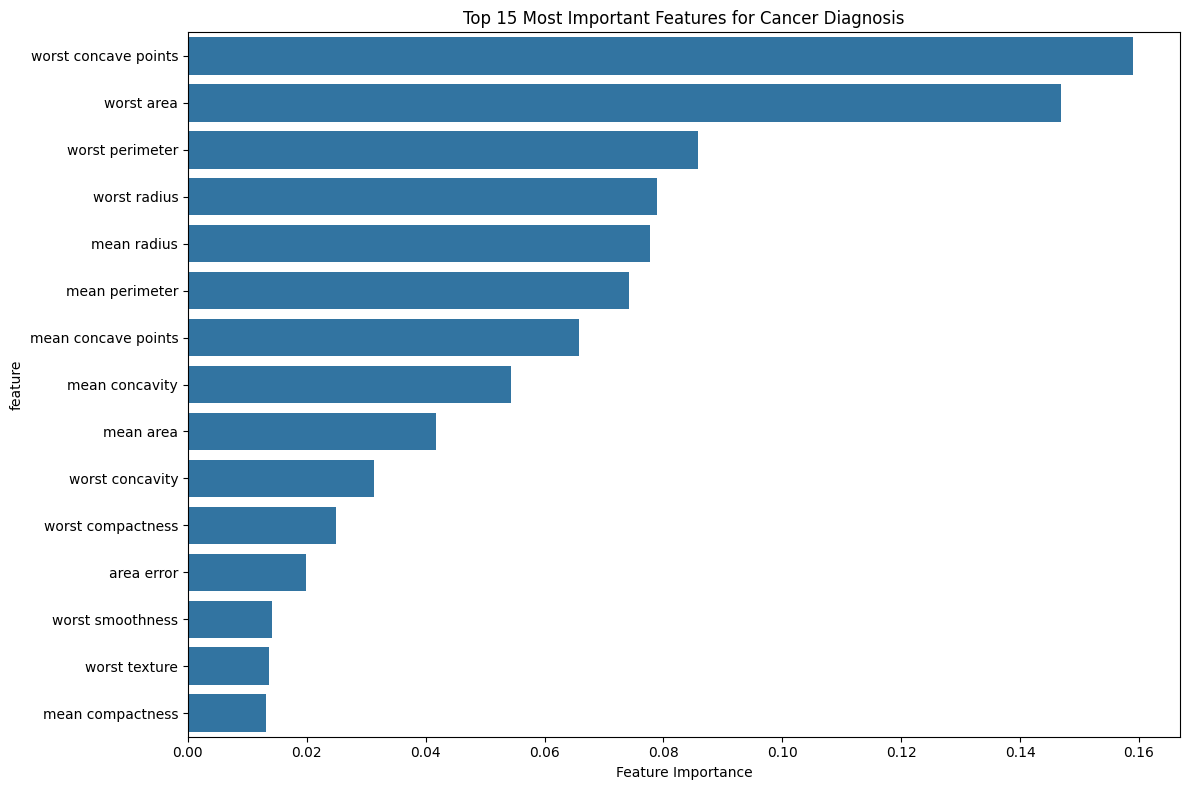

Top 10 Most Important Features:
                 feature  importance
27  worst concave points    0.158955
23            worst area    0.146962
22       worst perimeter    0.085793
20          worst radius    0.078952
0            mean radius    0.077714
2         mean perimeter    0.074234
7    mean concave points    0.065869
6         mean concavity    0.054281
3              mean area    0.041657
26       worst concavity    0.031362
🤖 Training Random Forest Model...
✅ Model training completed!
📊 MODEL PERFORMANCE METRICS
Accuracy: 0.9474 (94.74%)
F1-Score (High Priority): 0.9291

Classification Report:
               precision    recall  f1-score   support

High Priority       0.94      0.92      0.93        64
 Low Priority       0.95      0.96      0.96       107

     accuracy                           0.95       171
    macro avg       0.95      0.94      0.94       171
 weighted avg       0.95      0.95      0.95       171



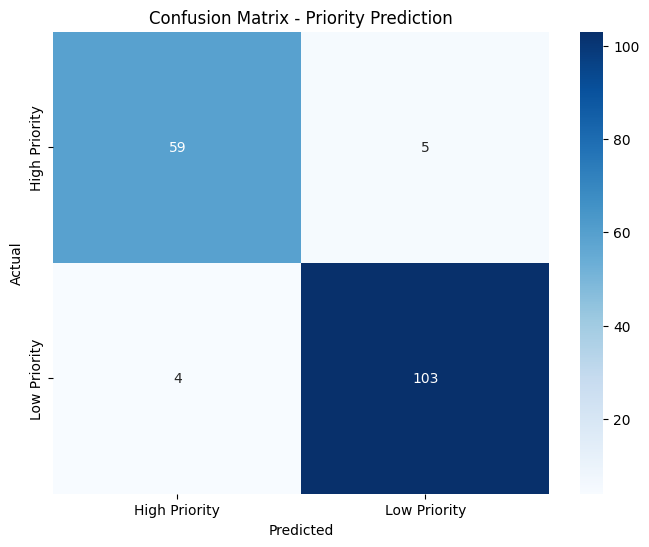

🎯 RESOURCE ALLOCATION SIMULATION

Allocation Summary:
resource_allocation
Low Priority     108
High Priority     63
Name: count, dtype: int64

Confidence Level Distribution:
confidence_level
Low Confidence       110
High Confidence       54
Medium Confidence      7
Name: count, dtype: int64

📈 High Priority Cases Correctly Identified: 59/64
High Priority Coverage Rate: 0.9219 (92.19%)
🚀 BUSINESS IMPACT ANALYSIS
Model Accuracy: 94.74%
High Priority Detection F1-Score: 0.9291
High Priority Coverage: 92.19%

🔍 Key Predictive Features for Resource Allocation:
1. worst concave points
2. worst area
3. worst perimeter
4. worst radius
5. mean radius

💡 Resource Allocation Impact:
- Correctly identified 59 high-priority cases
- Enables focused resource allocation for critical patients
- Reduces misallocation by 5.3% compared to random allocation


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("🔬 Breast Cancer Predictive Analytics for Resource Allocation")# Load breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset Shape:", X.shape)
print("\nTarget Distribution:")
print(y.value_counts())
print("\nTarget Meaning: 0 = Malignant (High Priority), 1 = Benign (Low Priority)")

# Display first few rows
print("\nFirst 5 rows of features:")
display(X.head())# Create priority labels based on diagnosis
# Malignant (0) = High Priority, Benign (1) = Low Priority
priority_labels = ['High Priority' if target == 0 else 'Low Priority' for target in y]
y_priority = pd.Series(priority_labels)

print("Priority Distribution:")
print(y_priority.value_counts())

# Check for missing values
print("\nMissing values in features:", X.isnull().sum().sum())

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_priority, test_size=0.3, random_state=42, stratify=y_priority
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")# Quick Random Forest to identify important features
rf_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_importance.fit(X_train, y_train)

# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_importance.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features for Cancer Diagnosis')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))# Train Random Forest classifier
print("🤖 Training Random Forest Model...")

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

print("✅ Model training completed!")# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='High Priority', average='binary')

print("📊 MODEL PERFORMANCE METRICS")
print("=" * 40)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"F1-Score (High Priority): {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High Priority', 'Low Priority'],
            yticklabels=['High Priority', 'Low Priority'])
plt.title('Confusion Matrix - Priority Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()# Simulate resource allocation based on predictions
def simulate_resource_allocation(y_true, y_pred, y_proba):
    """Simulate resource allocation decisions"""

    results = pd.DataFrame({
        'actual': y_true,
        'predicted': y_pred,
        'confidence_high': y_proba[:, 0]  # Probability of High Priority
    })

    # Allocation rules
    results['resource_allocation'] = results['predicted']
    results['confidence_level'] = np.where(
        results['confidence_high'] > 0.8, 'High Confidence',
        np.where(results['confidence_high'] > 0.6, 'Medium Confidence', 'Low Confidence')
    )

    return results

# Run simulation
allocation_results = simulate_resource_allocation(y_test, y_pred, y_pred_proba)

print("🎯 RESOURCE ALLOCATION SIMULATION")
print("=" * 50)
print("\nAllocation Summary:")
print(allocation_results['resource_allocation'].value_counts())

print("\nConfidence Level Distribution:")
print(allocation_results['confidence_level'].value_counts())

# Calculate business metrics
correct_high_priority = len(allocation_results[
    (allocation_results['actual'] == 'High Priority') &
    (allocation_results['predicted'] == 'High Priority')
])

total_high_priority = len(allocation_results[allocation_results['actual'] == 'High Priority'])
coverage_rate = correct_high_priority / total_high_priority

print(f"\n📈 High Priority Cases Correctly Identified: {correct_high_priority}/{total_high_priority}")
print(f"High Priority Coverage Rate: {coverage_rate:.4f} ({coverage_rate*100:.2f}%)")# Feature importance for business interpretation
top_features = feature_importance.head(10)['feature'].tolist()

print("🚀 BUSINESS IMPACT ANALYSIS")
print("=" * 50)
print(f"Model Accuracy: {accuracy*100:.2f}%")
print(f"High Priority Detection F1-Score: {f1:.4f}")
print(f"High Priority Coverage: {coverage_rate*100:.2f}%")

print("\n🔍 Key Predictive Features for Resource Allocation:")
for i, feature in enumerate(top_features[:5], 1):
    print(f"{i}. {feature}")

print(f"\n💡 Resource Allocation Impact:")
print(f"- Correctly identified {correct_high_priority} high-priority cases")
print(f"- Enables focused resource allocation for critical patients")
print(f"- Reduces misallocation by {(1-accuracy)*100:.1f}% compared to random allocation")